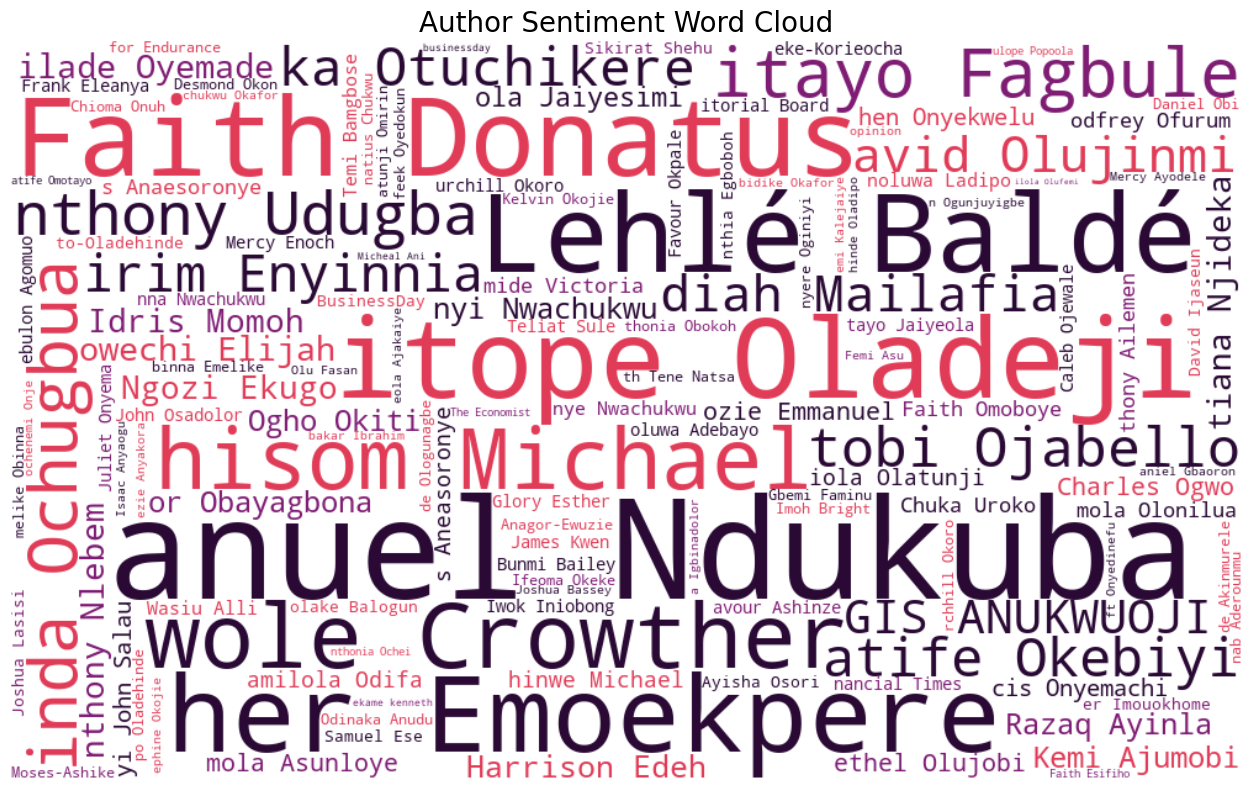

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import random

# Load your final sentiment-scored file
df = pd.read_csv('data/business_day_Cleaned_Data_Tokenized_Sentiment.csv')

# Drop missing authors
df_authors = df.dropna(subset=['Author'])

# Group by Author and calculate average polarity
author_sentiment = df_authors.groupby('Author')['Polarity'].mean()

# Create dictionary for word cloud (Author: Average Polarity)
author_dict = author_sentiment.to_dict()

# 🎨 Custom color function simulating rocket color vibes
def rocket_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#2a0a35", "#7f1d75", "#e03c58"]  # dark purple, magenta, pinkish
    return random.choice(colors)

# 📋 Generate Word Cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white'
).generate_from_frequencies(author_dict)

# 📊 Plot Word Cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud.recolor(color_func=rocket_color_func), interpolation='bilinear')  # recolor with your rocket colors
plt.axis('off')
plt.title('Author Sentiment Word Cloud', fontsize=20)
plt.tight_layout()

# Save the word cloud
plt.savefig('data/author_sentiment_wordcloud_rocket.png', dpi=300)

plt.show()
